# Collaboration value

In [1]:
from google.cloud import bigquery

In [2]:
# Global constants
PROJECT_ID = 'collaboration-recommender'
# Initialize global variables
bq_client = bigquery.Client(project=PROJECT_ID)

In [9]:
# Get the author's profile
article_query = f"""
SELECT NORMALIZED_ARTICLE_CITATION_COUNT AS NORMALIZED_CITATIONS,
NEW_COLLABORATION_IMPACT_COUNT AS EUTOPIA_CITATION_REACH,
PAIRWISE_COLLABORATION_CONTINUATION AS COLLABORATION_CONTINUATION,
PAIRWISE_COLLABORATION_DURATION + PAIRWISE_COLLABORATION_CONTINUATION AS COLLABORATION_LONGEVITY
FROM PROD.FCT_ARTICLE
"""

article_df = bq_client.query(article_query).to_dataframe()

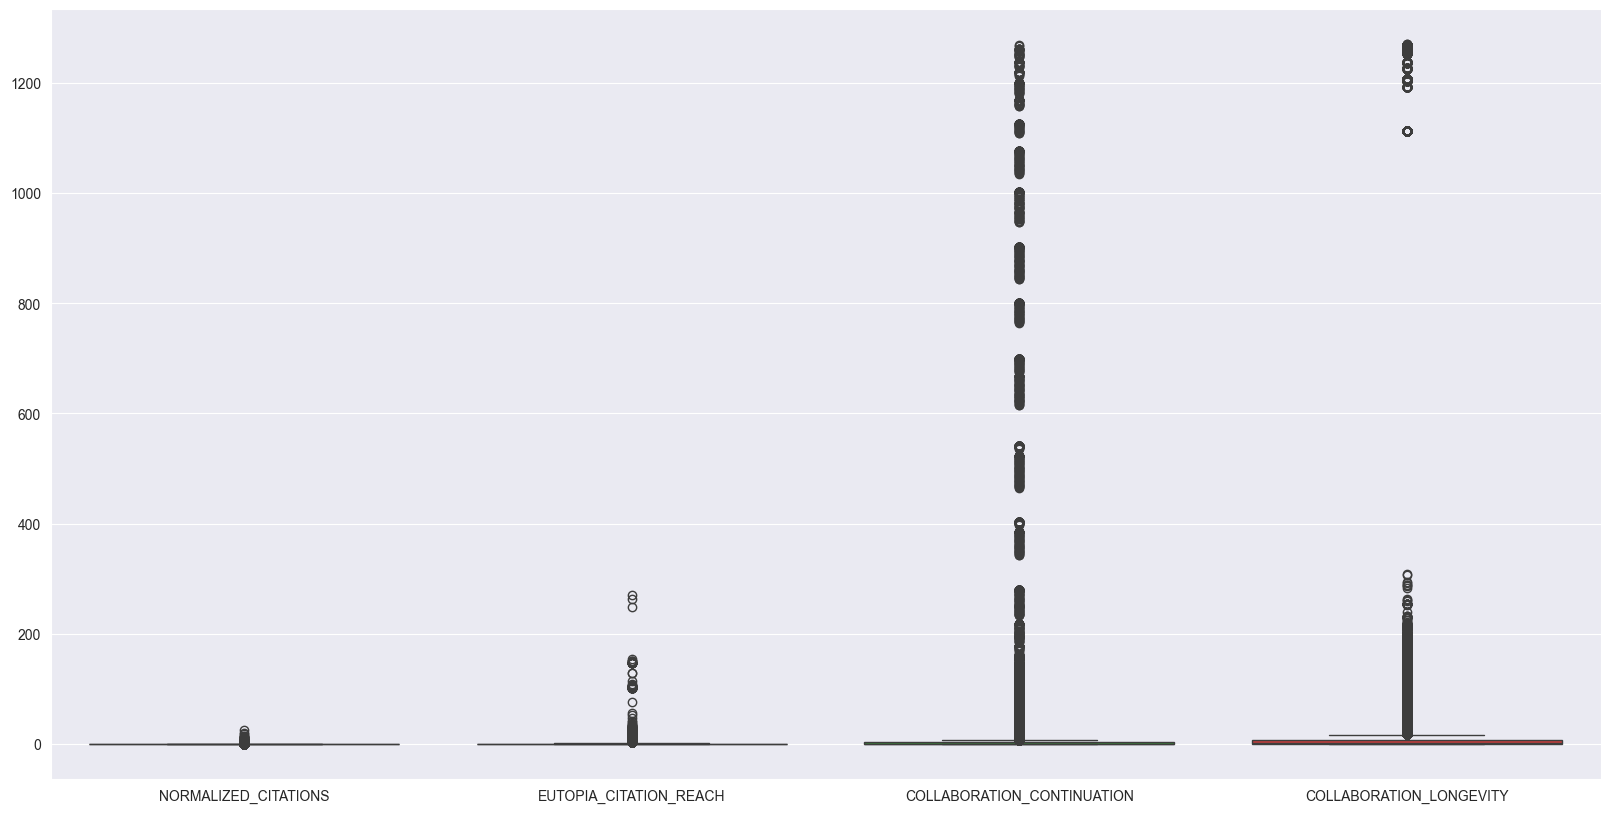

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show box scripts for all the features
plt.figure(figsize=(20, 10))
sns.boxplot(data=article_df)
plt.show()


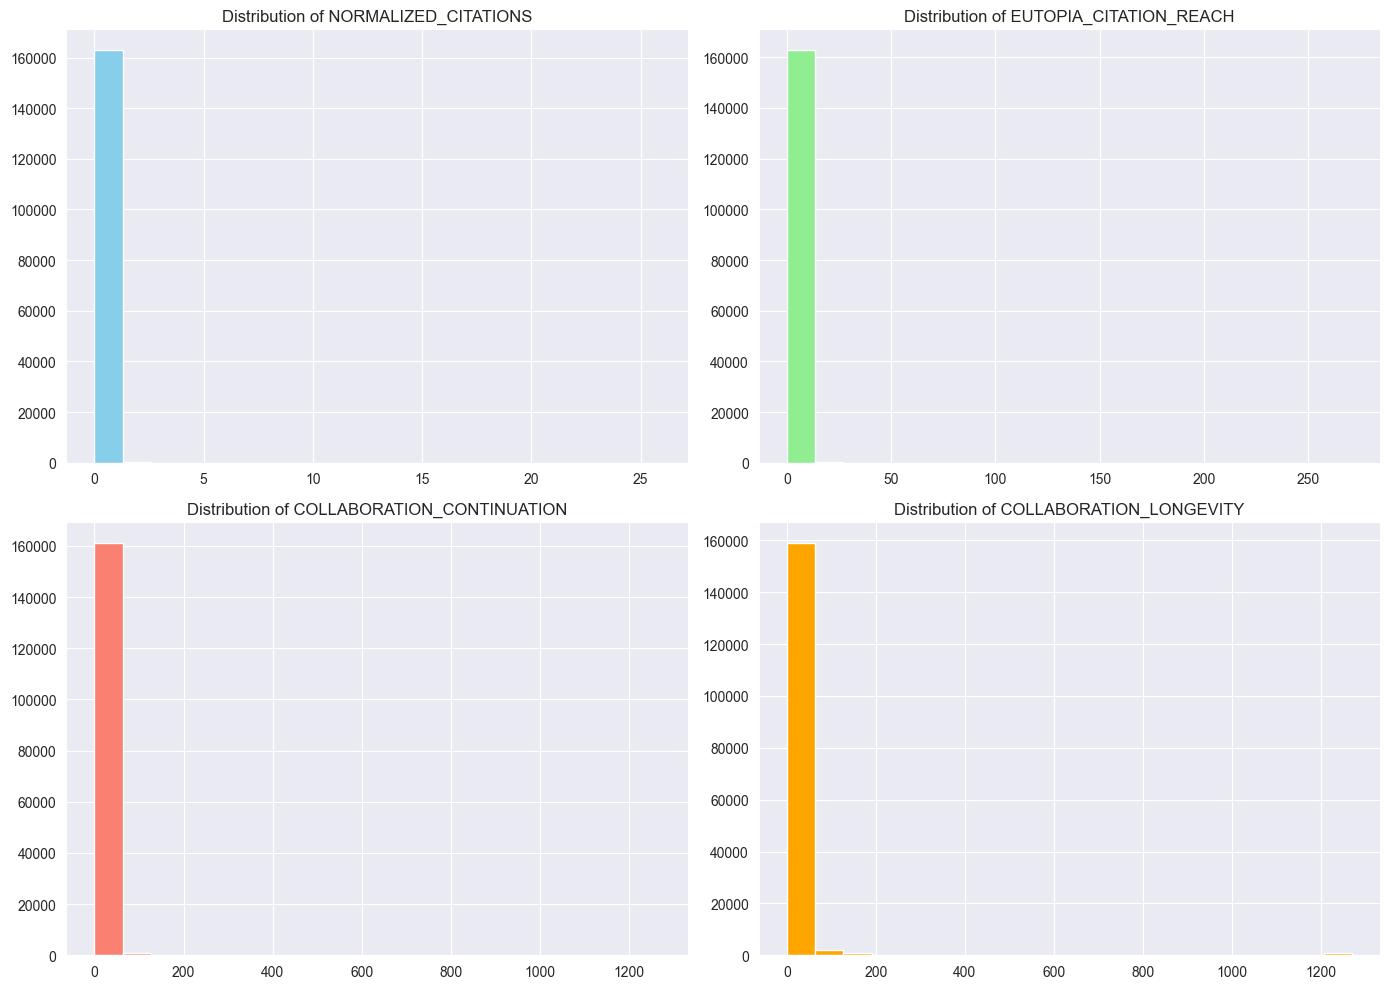

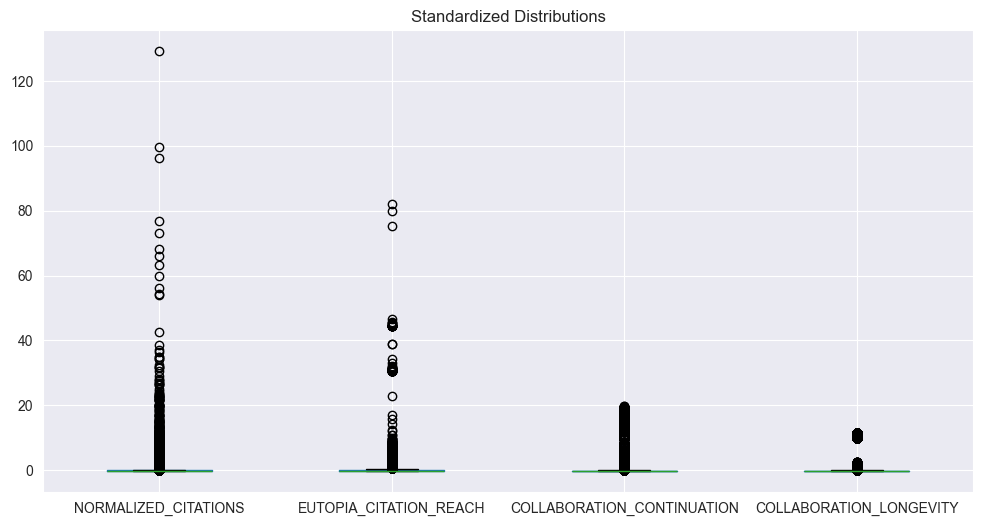

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(article_df), columns=article_df.columns)

# Normalization
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(article_df), columns=article_df.columns)

# Plotting the distributions using histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(article_df['NORMALIZED_CITATIONS'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of NORMALIZED_CITATIONS')

axes[0, 1].hist(article_df['EUTOPIA_CITATION_REACH'], bins=20, color='lightgreen')
axes[0, 1].set_title('Distribution of EUTOPIA_CITATION_REACH')

axes[1, 0].hist(article_df['COLLABORATION_CONTINUATION'], bins=20, color='salmon')
axes[1, 0].set_title('Distribution of COLLABORATION_CONTINUATION')

axes[1, 1].hist(article_df['COLLABORATION_LONGEVITY'], bins=20, color='orange')
axes[1, 1].set_title('Distribution of COLLABORATION_LONGEVITY')

plt.tight_layout()
plt.show()

# Alternatively, using Boxplot for comparison
df_standardized.boxplot(figsize=(12, 6))
plt.title("Standardized Distributions")
plt.show()

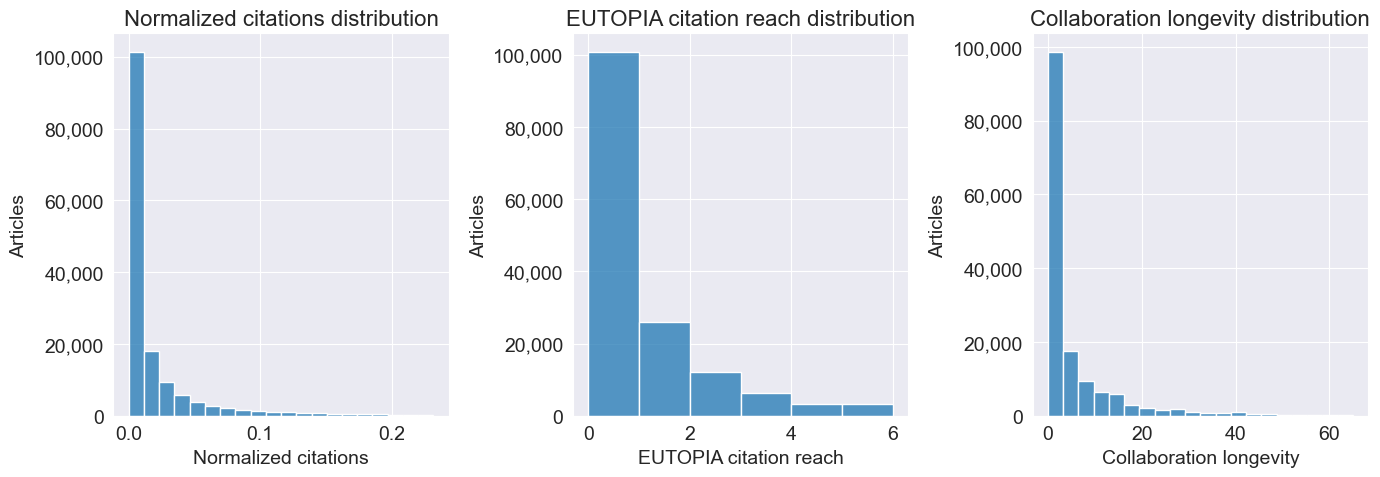

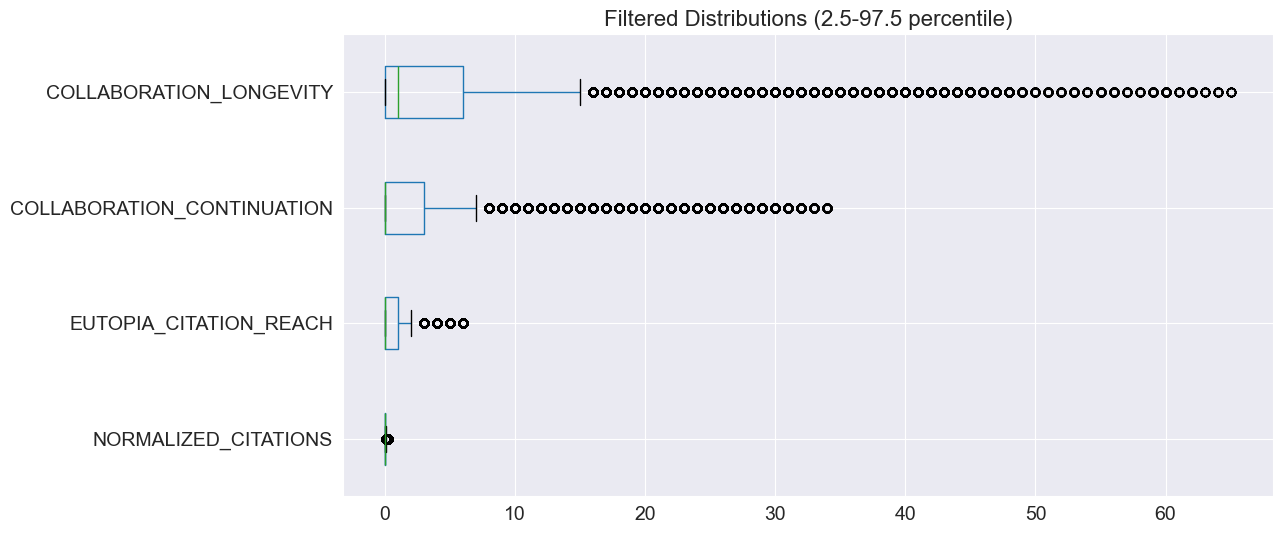

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.rcParams.update({
    'font.size': 14,  # Global font size
    'axes.titlesize': 16,  # Title font size
    'axes.labelsize': 14,  # X and Y label font size
    'xtick.labelsize': 14,  # X tick label font size
    'ytick.labelsize': 14,  # Y tick label font size
    'legend.fontsize': 14,  # Legend font size
    'figure.titlesize': 18  # Figure title font size
})
# Assuming `df` is your dataframe after executing the SQL query

# Calculate the 2.5th and 97.5th percentiles
lower_bound = article_df.quantile(0.025)
upper_bound = article_df.quantile(0.975)

# Filter the data to include only values within these percentiles
article_df_filtered = article_df[(article_df >= lower_bound) & (article_df <= upper_bound)]

# Drop any NaN values that result from the filtering
article_df_filtered = article_df_filtered.dropna()

# Visualizing the distributions after filtering
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.histplot(article_df_filtered['NORMALIZED_CITATIONS'], bins=20, ax=axes[0])
axes[0].set_ylabel('Articles')
axes[0].set_title('Normalized citations distribution')
axes[0].set_xlabel('Normalized citations')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.histplot(article_df_filtered['EUTOPIA_CITATION_REACH'], bins=6, ax=axes[1])
axes[1].set_ylabel('Articles')
axes[1].set_title('EUTOPIA citation reach distribution')
axes[1].set_xlabel('EUTOPIA citation reach')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.histplot(article_df_filtered['COLLABORATION_LONGEVITY'], bins=20, ax=axes[2])
axes[2].set_ylabel('Articles')
axes[2].set_title('Collaboration longevity distribution')
axes[2].set_xlabel('Collaboration longevity')
axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('../assets/report_figures/value_distributions.png')
plt.show()

# Alternatively, using Boxplot for comparison
article_df_filtered.boxplot(figsize=(12, 6), vert=False)
plt.title("Filtered Distributions (2.5-97.5 percentile)")
plt.show()

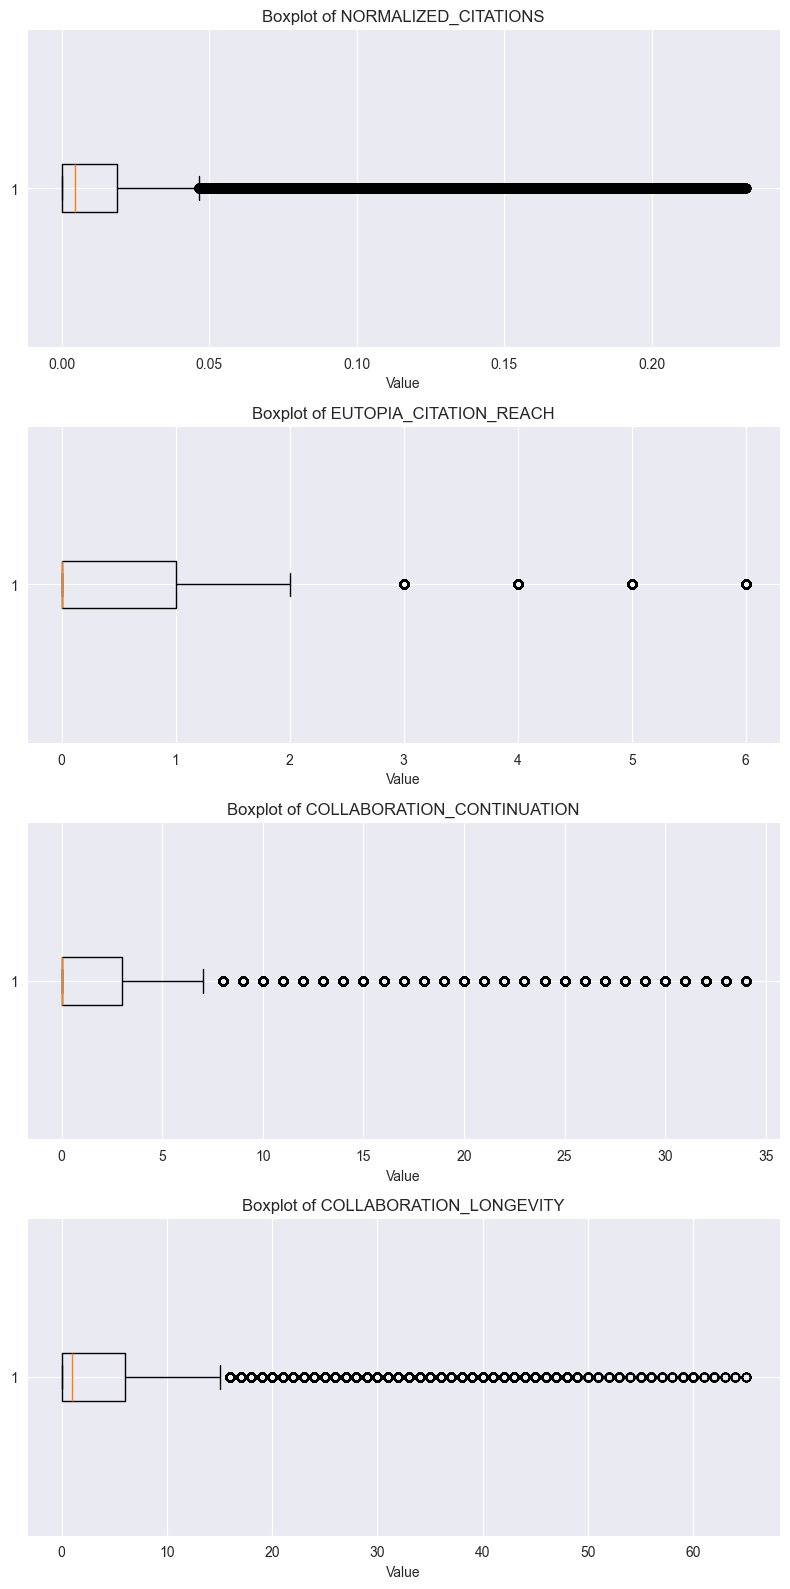

In [23]:
import matplotlib.pyplot as plt

# Assuming `df_filtered` is your filtered dataframe

# Create a list of column names
columns = article_df_filtered.columns

# Define the number of scripts
num_plots = len(columns)

# Set up the figure and axes
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# If there is only one plot, axes will not be a list, so we need to handle that
if num_plots == 1:
    axes = [axes]

# Loop through each column and create a boxplot
for i, col in enumerate(columns):
    axes[i].boxplot(article_df_filtered[col].dropna(), vert=False)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the scripts
plt.show()

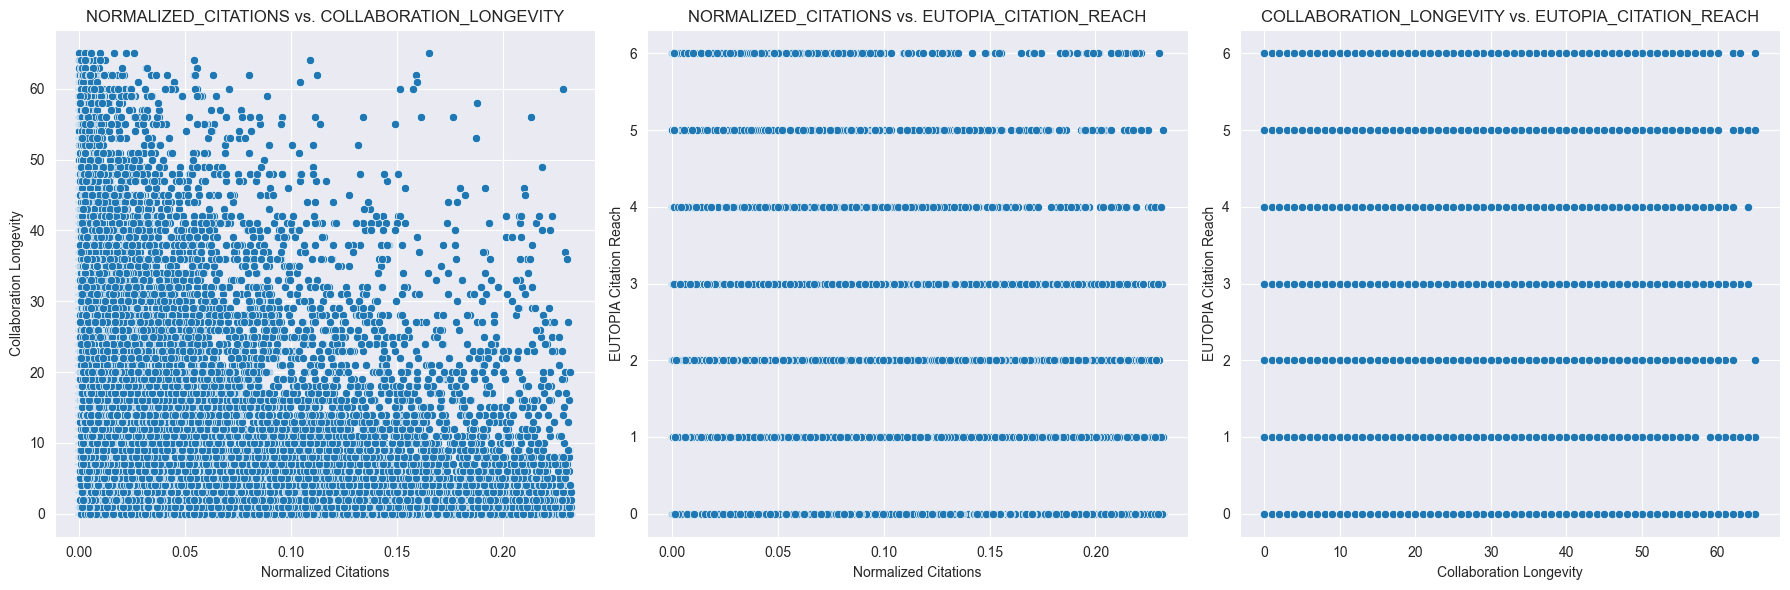

In [45]:

# Assuming `df_filtered` is your filtered dataframe

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot 1: NORMALIZED_CITATIONS vs. COLLABORATION_LONGEVITY
sns.scatterplot(x='NORMALIZED_CITATIONS', y='COLLABORATION_LONGEVITY', data=article_df_filtered, ax=axes[0])
axes[0].set_title('NORMALIZED_CITATIONS vs. COLLABORATION_LONGEVITY')
axes[0].set_xlabel('Normalized Citations')
axes[0].set_ylabel('Collaboration Longevity')

# Scatterplot 2: NORMALIZED_CITATIONS vs. EUTOPIA_CITATION_REACH
sns.scatterplot(x='NORMALIZED_CITATIONS', y='EUTOPIA_CITATION_REACH', data=article_df_filtered, ax=axes[1])
axes[1].set_title('NORMALIZED_CITATIONS vs. EUTOPIA_CITATION_REACH')
axes[1].set_xlabel('Normalized Citations')
axes[1].set_ylabel('EUTOPIA Citation Reach')

# Scatterplot 3: COLLABORATION_LONGEVITY vs. EUTOPIA_CITATION_REACH
sns.scatterplot(x='COLLABORATION_LONGEVITY', y='EUTOPIA_CITATION_REACH', data=article_df_filtered, ax=axes[2])
axes[2].set_title('COLLABORATION_LONGEVITY vs. EUTOPIA_CITATION_REACH')
axes[2].set_xlabel('Collaboration Longevity')
axes[2].set_ylabel('EUTOPIA Citation Reach')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the scripts
plt.show()

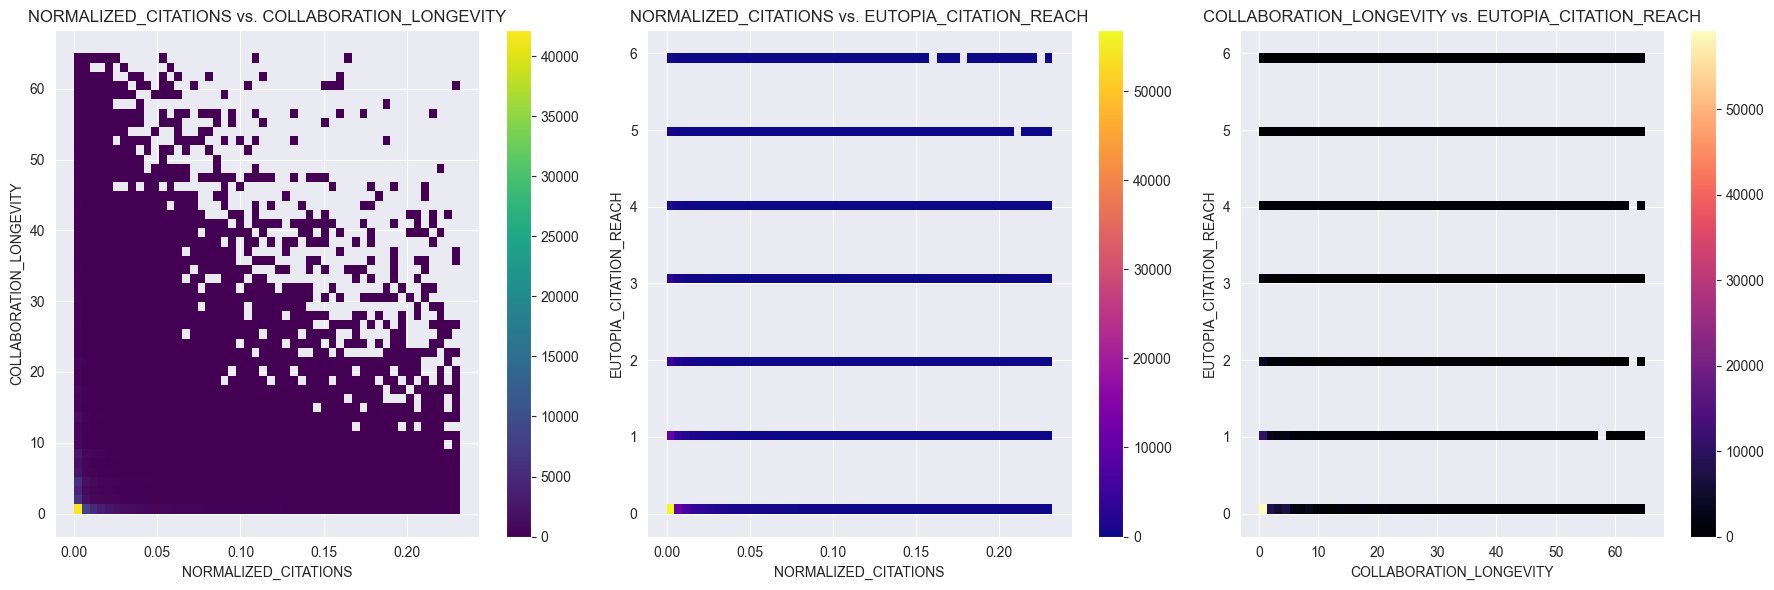

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df_filtered` is your filtered dataframe

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap 1: NORMALIZED_CITATIONS vs. COLLABORATION_LONGEVITY
sns.histplot(
    data=article_df_filtered,
    x='NORMALIZED_CITATIONS',
    y='COLLABORATION_LONGEVITY',
    bins=50,
    pmax=0.9,  # clipping to enhance the color contrast
    cmap='viridis',
    cbar=True,
    ax=axes[0]
)
axes[0].set_title('NORMALIZED_CITATIONS vs. COLLABORATION_LONGEVITY')

# Heatmap 2: NORMALIZED_CITATIONS vs. EUTOPIA_CITATION_REACH
sns.histplot(
    data=article_df_filtered,
    x='NORMALIZED_CITATIONS',
    y='EUTOPIA_CITATION_REACH',
    bins=50,
    pmax=0.9,  # clipping to enhance the color contrast
    cmap='plasma',
    cbar=True,
    ax=axes[1]
)
axes[1].set_title('NORMALIZED_CITATIONS vs. EUTOPIA_CITATION_REACH')

# Heatmap 3: COLLABORATION_LONGEVITY vs. EUTOPIA_CITATION_REACH
sns.histplot(
    data=article_df_filtered,
    x='COLLABORATION_LONGEVITY',
    y='EUTOPIA_CITATION_REACH',
    bins=50,
    pmax=0.9,  # clipping to enhance the color contrast
    cmap='magma',
    cbar=True,
    ax=axes[2]
)
axes[2].set_title('COLLABORATION_LONGEVITY vs. EUTOPIA_CITATION_REACH')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the scripts
plt.show()